In [1]:
!pip install keras==2.3.1 -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [2]:
!pip install matplotlib -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [28]:
import tensorflow as tf
print(tf.__version__)

1.15.0


read train files: 25000
read test files: 25000
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 380, 32)           121600    
_________________________________________________________________
dropout_19 (Dropout)         (None, 380, 32)           0         
_________________________________________________________________
simple_rnn_10 (SimpleRNN)    (None, 16)                784       
_________________________________________________________________
dense_19 (Dense)             (None, 256)               4352      
_________________________________________________________________
dropout_20 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 257       
Total params: 126,993
Trainable params: 126,993
Non-trainable params: 0


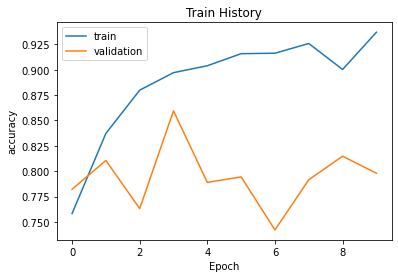

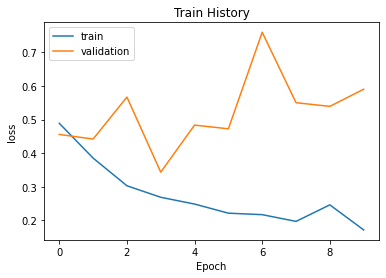

In [57]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer

import re
re_tag = re.compile(r'<[^>]+>') #导入一个包，正则表达式
 
def rm_tags(text):
    return re_tag.sub('', text) #把compile里面的符号都换成空
 
import os     #导入操作系统
def read_files(filetype):
    path = "E:/aclImdb/"
    file_list=[]
 
    positive_path=path + filetype+"/pos/"
    for f in os.listdir(positive_path):
        file_list+=[positive_path+f]
    
    negative_path=path + filetype+"/neg/"
    for f in os.listdir(negative_path):
        file_list+=[negative_path+f]
        
    print('read',filetype, 'files:',len(file_list))
       
    all_labels = ([1] * 12500 + [0] * 12500) 
    
    all_texts  = []
    
    for fi in file_list:
        with open(fi,encoding='utf8') as file_input:
            all_texts += [rm_tags(" ".join(file_input.readlines()))]
            
    return all_labels,all_texts
 
y_train,train_text=read_files("train") #读取train，并写入输出缓存
y_test,test_text=read_files("test")
token = Tokenizer(num_words=3800)   #告诉token要建立一个3800个单词的字典
token.fit_on_texts(train_text)      #告诉token现在开始读文章（train_text），并且对文章里面的单词出现过的次数做统计，从高到低依次排列。
                                    #运行完这一句token就将所有单词的出现过的次数统计好了1代表出现频率最高的单词，2代表出现频率第二高的单词，3代表.....
x_train_seq = token.texts_to_sequences(train_text)  #告诉token把文章（train_text）里的内容替换成数字
x_test_seq  = token.texts_to_sequences(test_text)   #告诉token把文章（test_text）里的内容替换成数字
x_train = sequence.pad_sequences(x_train_seq, maxlen=380)  #告诉token将文章中的每句话单词的长度统一到定长
x_test  = sequence.pad_sequences(x_test_seq,  maxlen=380)  #执行完以上语句，那么文章中的每句话单词的数量全部为380
 
#####建立模型
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN
 
model = Sequential() #建立一个序列，把模型加进去，keras使用的方法
 
model.add(Embedding(output_dim=32,
                    input_dim=3800, 
                    input_length=380))  #把数字转化为词向量，单词已经在字典中变成数字编码了
model.add(Dropout(0.35))
 
model.add(SimpleRNN(units=16))
 
model.add(Dense(units=256,activation='relu' )) #256是超参数，随便设的
 
model.add(Dropout(0.35))        #防止过拟合的参数，过拟合是指在训练集上训练的太好了，把不是主要的特征当作主要特征了，我和你都选了课题，但是你是女的，输出我们不是一类
 
model.add(Dense(units=1,activation='sigmoid' )) #输出是一的概率是多大，是二分类
 
model.summary()   #代表模型结束，输出模型的参数情况，就是架构图
 
#####训练模型
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
 
train_history =model.fit(x_train, y_train,batch_size=100, 
                         epochs=10,verbose=2,
                         validation_split=0.2)   #verbose = 0 为不在标准输出流输出日志信息，verbose = 1 为输出进度条记录，verbose = 2 为每个epoch输出一行记录
#epoch就是训练次数，batch是一次训练多少条数据，把训练中多少分给测试集
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
 
show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')
 

In [58]:
test_loss,test_acc = model.evaluate(x_test, y_test, verbose=1)
print(test_acc)

25000/25000 [==============================] - 9s 361us/step
0.8384799957275391


In [59]:
#####查看预测结果
predict=model.predict_classes(x_test)
predict_classes=predict.reshape(25000)
SentimentDict={1:'正面的',0:'负面的'}
def display_test_Sentiment(i):
    print(test_text[i])
    print('label真实值:',SentimentDict[y_test[i]],
          '预测结果:',SentimentDict[predict_classes[i]])
 
display_test_Sentiment(727)

display_test_Sentiment(666)

display_test_Sentiment(12727)


I did something a little daring tonight when I watched this movie. I attempted to wean myself from silent movie scores. Sure, when this film originally was distributed, a piano score was probably played with it. Oftentimes, the director would choose the score himself (Charlie Chaplin often composed the scores of his later silent films). But most of the music you hear on VHS tapes over silent films is in no way the same music that was supposed to be played when the film was first released. And, then again, there were plenty of silent films that were played without a score. I do not know the history of Potemkin's score, so I decided to watch it for the medium this piece of art was produced within - film. Soon after I turned the music off, unaided (or should I say unimpeded) by the musical interpretation of the emotions on screen, I became utterly attached to the film. Visually, it is easily one of the most stunning of all films. Eisenstein was a master of composition. The editing, possib

In [60]:
#预测新的影评
def predict_review(input_text):
    input_seq = token.texts_to_sequences([input_text])
    pad_input_seq  = sequence.pad_sequences(input_seq , maxlen=380)
    predict_result=model.predict_classes(pad_input_seq)
    print(SentimentDict[predict_result[0][0]])

In [64]:
typing=input("输入一段影评:")
predict_review(typing)

输入一段影评:this movie is bad
负面的
